In [105]:
import yfinance as yf
df = yf.download('TSLA', start='2015-01-01', end='2025-08-01')
df2 = yf.download('TSLA', start='2025-08-01', end='2025-08-28')


/tmp/ipykernel_60424/1992649045.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA', start='2015-01-01', end='2025-08-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_60424/1992649045.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download('TSLA', start='2025-08-01', end='2025-08-28')
[*********************100%***********************]  1 of 1 completed


In [106]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [107]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-07-25,316.059998,323.630005,308.010010,308.739990,148227000
2025-07-28,325.589996,330.489990,315.690002,318.450012,112673800
2025-07-29,321.200012,326.250000,318.250000,325.549988,87358900
2025-07-30,319.040009,324.450012,311.619995,322.179993,83931900
2025-07-31,308.269989,321.369995,306.100006,319.609985,85270900


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2660 entries, 2015-01-02 to 2025-07-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   2660 non-null   float64
 1   (High, TSLA)    2660 non-null   float64
 2   (Low, TSLA)     2660 non-null   float64
 3   (Open, TSLA)    2660 non-null   float64
 4   (Volume, TSLA)  2660 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 124.7 KB


In [109]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,2660.000000,2660.000000,2660.000000,2660.000000,2.660000e+03
mean,126.561684,129.431991,123.572074,126.600042,1.120792e+08
std,120.653462,123.520571,117.741510,120.777170,7.257990e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.542334,17.795500,17.219667,17.509500,6.764302e+07
50%,51.772665,53.422998,50.489666,51.929001,9.346755e+07
75%,233.774166,238.530838,227.938332,233.440834,1.296937e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


In [110]:
df.shape

(2660, 5)

In [111]:
df.isnull().sum()

Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64

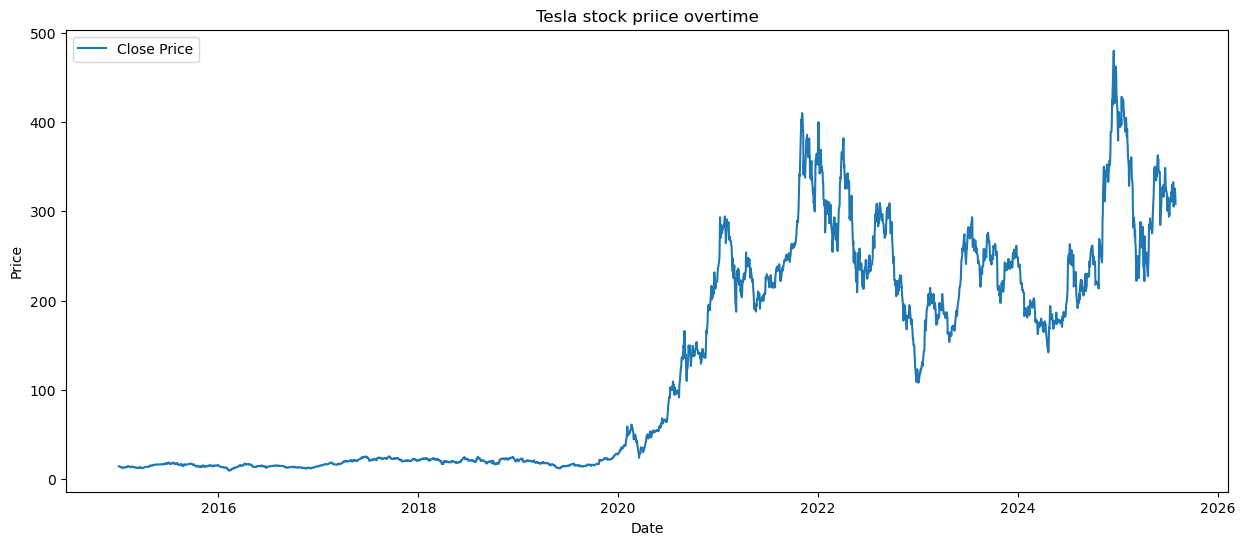

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(df['Close'],label = 'Close Price')
plt.title('Tesla stock priice overtime')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

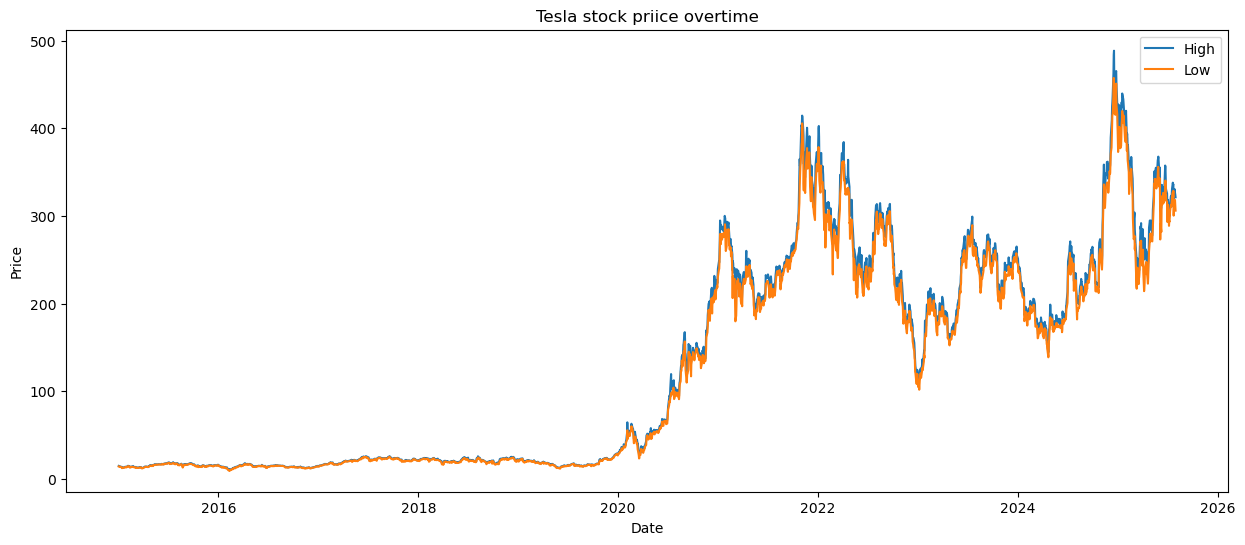

In [113]:
plt.figure(figsize=(15,6))
plt.plot(df['High'],label = 'High')
plt.plot(df['Low'],label = 'Low')
plt.title('Tesla stock priice overtime')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

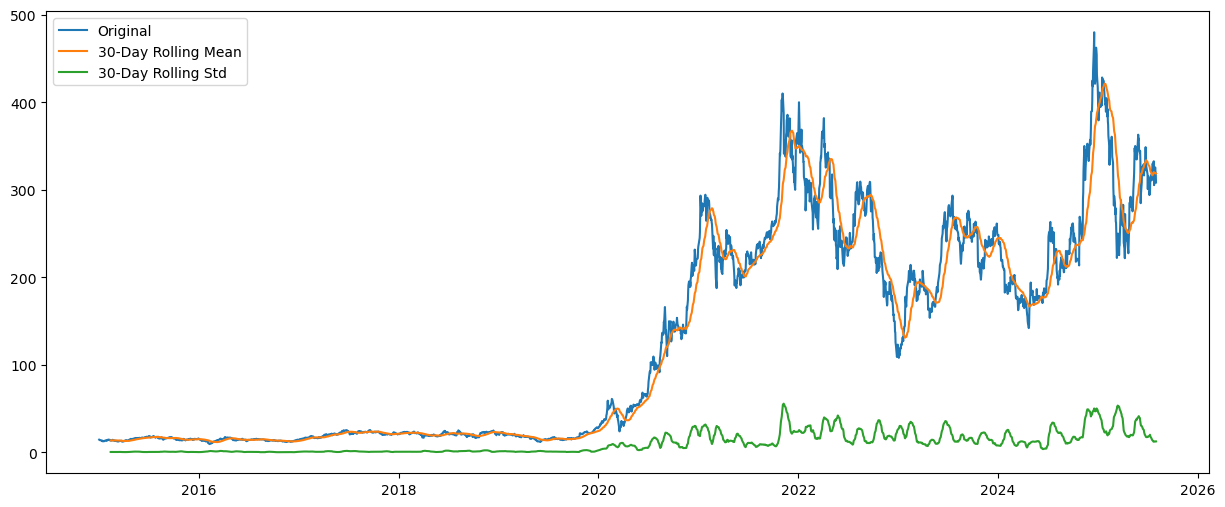

In [114]:
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(15,6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, label='30-Day Rolling Mean')
plt.plot(rolling_std, label='30-Day Rolling Std')
plt.legend()
plt.show()


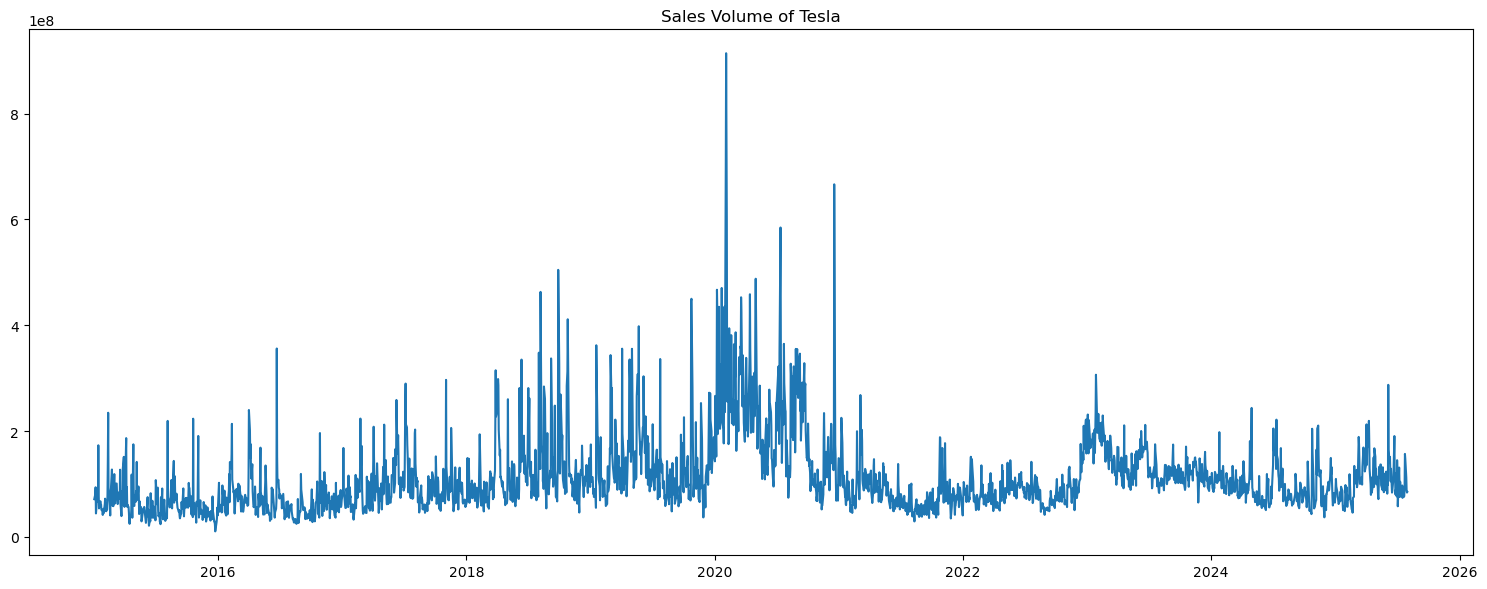

In [115]:


plt.figure(figsize=(15, 6))
plt.plot(df['Volume'])
plt.xlabel(None)
plt.title("Sales Volume of Tesla")
plt.tight_layout()
plt.show()



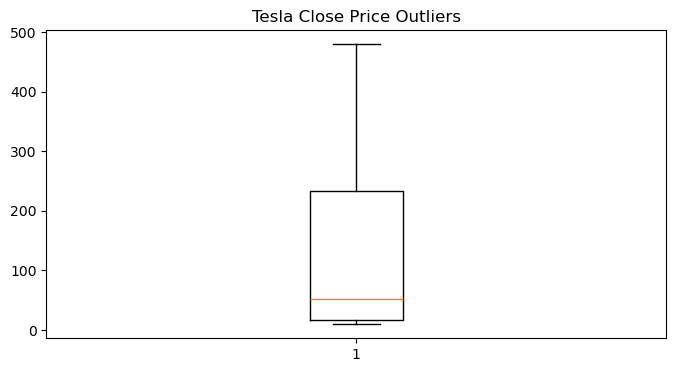

In [116]:
plt.figure(figsize=(8,4))
plt.boxplot(df['Close'])
plt.title('Tesla Close Price Outliers')
plt.show()


In [117]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.head()

,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [118]:
df.rename(columns={'Close_TSLA':'Close'}, inplace=True)

In [119]:
data = df['Close'].copy()

In [120]:
import pandas as pd

data = pd.DataFrame(data)

In [121]:
data.head()

,Close
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333


In [122]:
# Resample daily to fill missing weekends/holidays
data = data['Close'].resample('D').ffill()


<Figure size 1500x600 with 0 Axes>

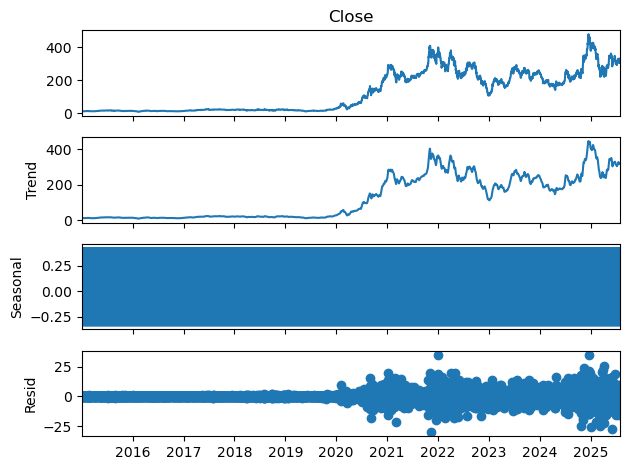

In [123]:
from statsmodels.tsa.seasonal import seasonal_decompose


plt.figure(figsize=(15,6))
seasonal_decompose(data).plot()
plt.show()

## Stationarity 

In [124]:
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import adfuller

def adf(series):

    result = adfuller(series, autolag='AIC')
    adf_stat = result[0]
    p_value = result[1]

    print(p_value)
    if p_value < 0.05:
       print('Reject Null Hypothesis → Series is stationary')
    else:
        print('Fail to Reject Null Hypothesis → Series is non-stationary')
    



In [125]:
adf(data)

0.6143565374023503
Fail to Reject Null Hypothesis → Series is non-stationary


In [126]:
data_diff = data.diff().dropna()


In [127]:
adf(data_diff)

8.918549013781136e-22
Reject Null Hypothesis → Series is stationary


# PACF and ACF Plots

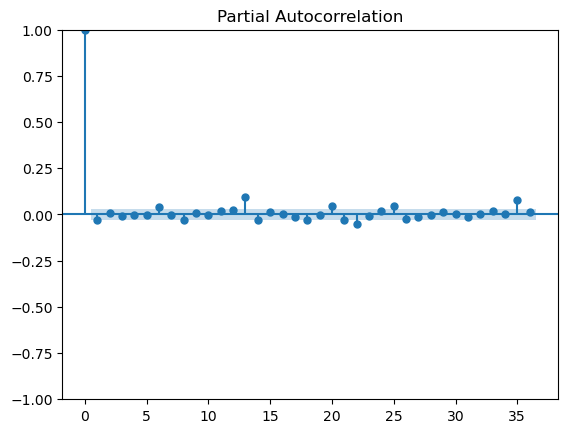

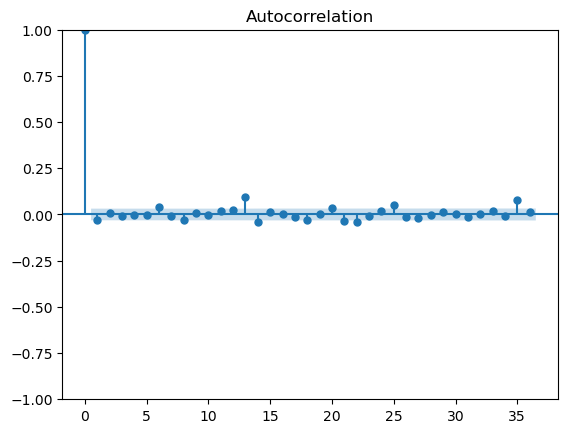

In [129]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_pacf(data_diff)
plot_acf(data_diff)
plt.show()

In [130]:
ratio = int(len(data)*0.8)

train = data[:ratio]
test = data[ratio:]

In [131]:
print(train.shape)
print(test.shape)

(3091,)
(773,)


# ARIMA

In [132]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,order=(1,1,1))
fit = model.fit()


In [133]:
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3091
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9114.002
Date:                Fri, 29 Aug 2025   AIC                          18234.003
Time:                        22:28:14   BIC                          18252.111
Sample:                    01-02-2015   HQIC                         18240.507
                         - 06-19-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0984      0.404     -0.244      0.807      -0.890       0.693
ma.L1          0.0735      0.404      0.182      0.856      -0.719       0.866
sigma2        21.3533      0.161    132.623      0.0

In [134]:
forecast_arima = fit.forecast(steps=len(test))

In [135]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error


def evaluate(actual,predicted):

    actual = np.array(actual)
    predicted = np.array(predicted)
    mae = mean_absolute_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    smape = 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

    plt.figure(figsize=(15,6))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(predicted, label='Predicted', color='red')
    plt.title('Actual VS Predicted')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.text(0.01, 0.96, f'sMAPE: {smape:.2f}%', transform=plt.gca().transAxes)
    plt.text(0.01, 0.91, f'MAE: {mae:.2f}', transform=plt.gca().transAxes)
    plt.text(0.01, 0.86, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes)

    plt.show()

    print('MAE',+mae)



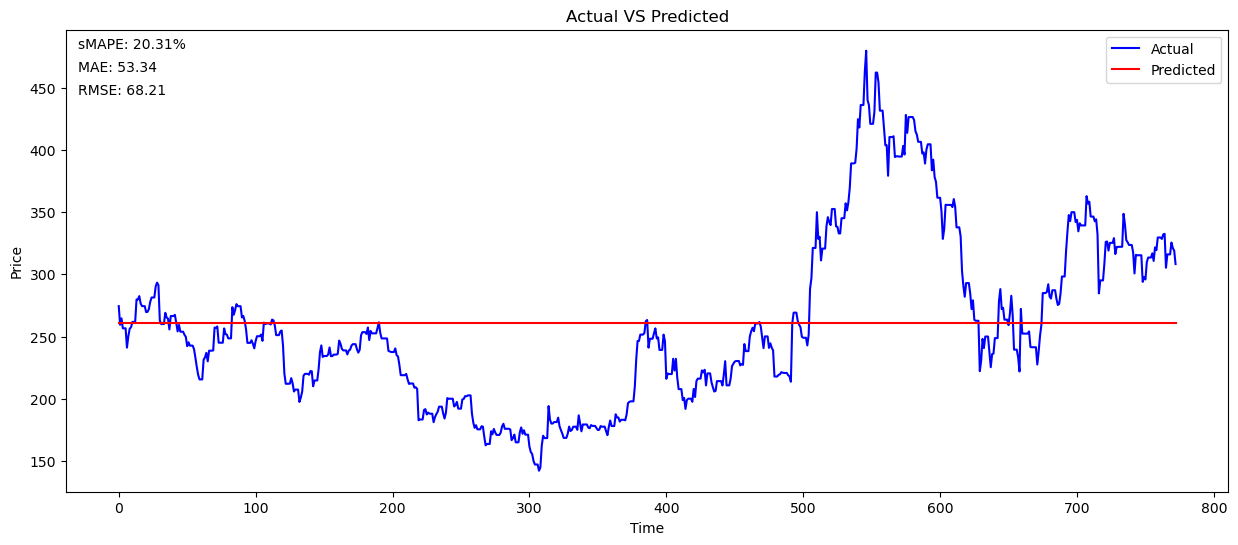

MAE 53.33909509164103


In [136]:
evaluate(test,forecast_arima)

# Exponential Smoothing

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(train, trend='add', seasonal=None)
fit_es = model_es.fit()
forecast_exs = fit_es.forecast(len(test))


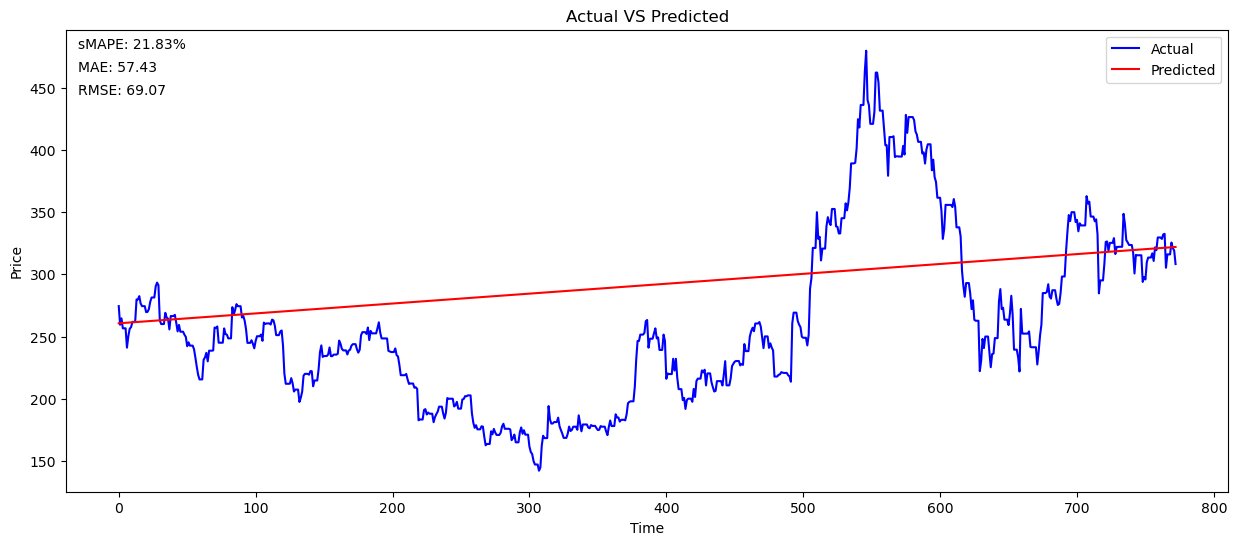

MAE 57.43372692347864


In [138]:
evaluate(test,forecast_exs)

# Prophet

In [139]:
data_prophet = train.reset_index()
data_prophet.columns = ['ds','y']


In [140]:
from prophet import Prophet

model_prophet = Prophet()
model_prophet.fit(data_prophet)

22:28:15 - cmdstanpy - INFO - Chain [1] start processing
22:28:16 - cmdstanpy - INFO - Chain [1] done processing


In [141]:
future = model_prophet.make_future_dataframe(periods=len(test))
prophet_predicted = model_prophet.predict(future)
forecast_prophet = prophet_predicted['yhat'][-len(test):].values  

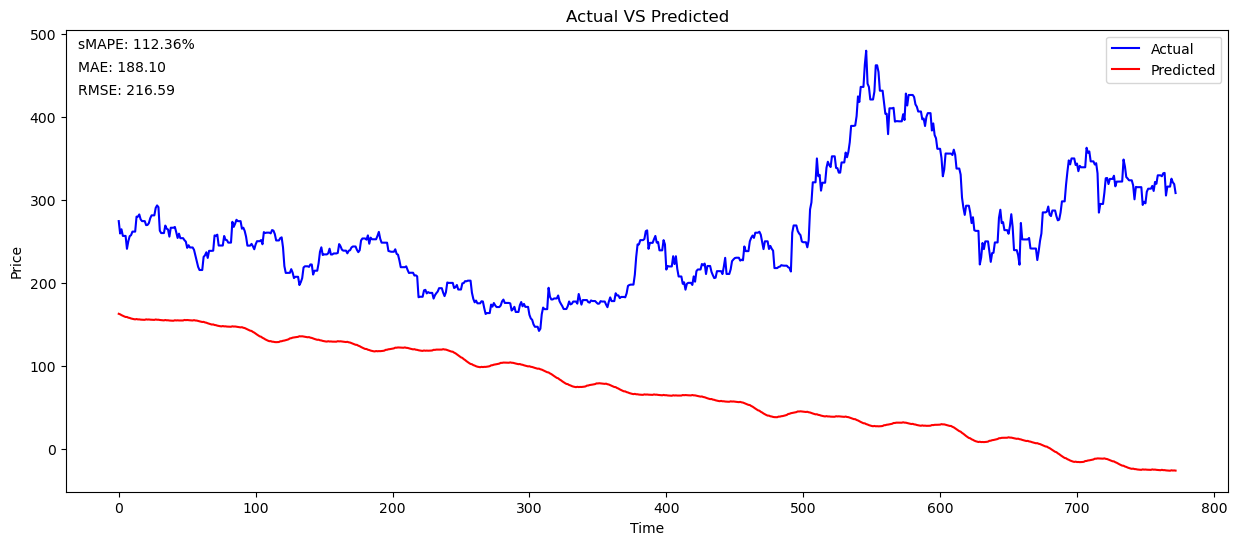

MAE 188.09554601652863


In [142]:
evaluate(test,forecast_prophet)

# LSTM

In [143]:
import numpy as np
import pandas as pd

data = df['Close'].values.reshape(-1,1)
data.shape

(2660, 1)

In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)




In [145]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 100
X,y = create_sequences(data_scaled,seq_length)

In [146]:
train_size = int(len(data)*0.8)
X_train, X_test = X[:train_size],X[train_size:]
y_train, y_test = y[:train_size],y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)


Epoch 1/50


/home/aswin/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0434
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0020
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 9.6987e-04
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 8.0254e-04
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 7.0100e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.7228e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.0890e-04
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 5.7722e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 5.6046e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.4865e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 5.0756e-04
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.5834e-04
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 4.9891e-04
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 4.7214e-04
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━

In [148]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)  
forecast_lstm = y_pred
y_test_actual = scaler.inverse_transform(y_test)   


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


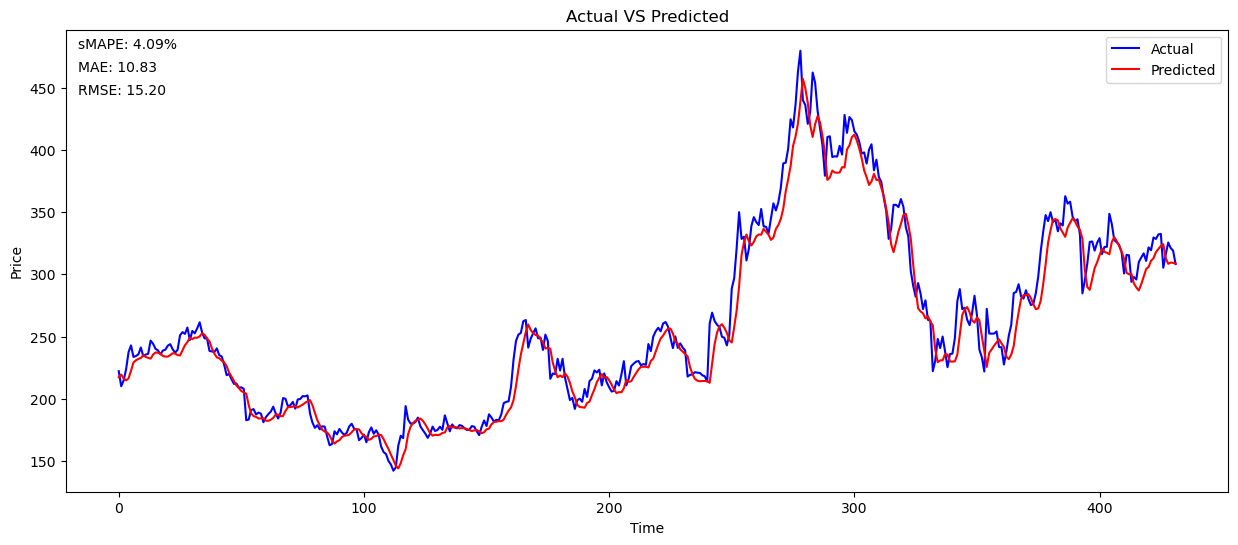

MAE 10.83143315491853


In [149]:
evaluate(y_test_actual, y_pred)


In [150]:
last_100_scaled = data_scaled[-100:]  

X_input = last_100_scaled.reshape(1, 100, 1)


In [151]:
next_day_scaled = model.predict(X_input)
next_day_price = scaler.inverse_transform(next_day_scaled) 
print("Next predicted price:", next_day_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Next predicted price: 304.13657


In [154]:
future_days = 30
future_predictions = []

current_input = last_100_scaled.copy()

for _ in range(future_days):
    pred_scaled = model.predict(current_input.reshape(1,100,1))
    pred_price = scaler.inverse_transform(pred_scaled)[0][0]
    future_predictions.append(pred_price)
    
    current_input = np.append(current_input[1:], pred_scaled)
    current_input = current_input.reshape(100,1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━

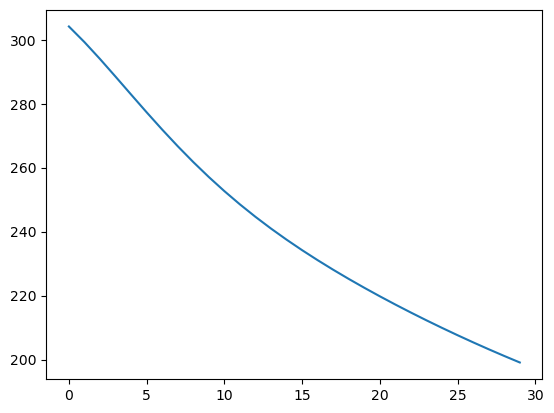

In [155]:
plt.plot(future_predictions)